In [1]:
from google.colab import files
upload = files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d thedevastator/weather-prediction
!unzip -qq /content/weather-prediction.zip

Saving kaggle.json to kaggle.json
100% 936k/936k [00:00<00:00, 1.09MB/s]
100% 936k/936k [00:00<00:00, 1.09MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('/content/weather_prediction_dataset.csv')
df.head(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7
6,20000107,1,8,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,...,1.7,4.1,2.8,0.96,1.0258,0.27,0.00,6.0,3.3,8.8
7,20000108,1,4,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,...,3.5,6.4,3.6,0.97,1.0210,0.18,0.14,8.2,5.3,11.0
8,20000109,1,8,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,...,3.3,5.1,3.0,0.91,1.0280,0.43,0.02,5.6,3.7,7.6
9,20000110,1,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,...,0.0,5.5,1.9,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


> 18개의 도시. 도시 별 9개의 날씨 관련 column. 도시 별로 예측값을 구하기  
> 2000~2008년까지 9년치 train, 2009년 1년치 test  
> 1년당 365일  
> 도시별 shape = (365*9, 9)  
> 도시별 loss는 plot하고 전체 도시의 예측값 실제값에 대한 MAE를 하나로 내기

In [33]:
df.iloc[:, -8:].isnull().sum()

TOURS_wind_speed          0
TOURS_humidity            0
TOURS_pressure            0
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
dtype: int64

In [ ]:
print(df.iloc[:, -8:].max())
print('=' * 30)
print(df.iloc[:, -8:].min())

TOURS_wind_speed          10.8000
TOURS_humidity             1.0000
TOURS_pressure             1.0414
TOURS_global_radiation     3.5600
TOURS_precipitation        6.2000
TOURS_temp_mean           31.2000
TOURS_temp_min            22.6000
TOURS_temp_max            39.8000
dtype: float64
TOURS_wind_speed           0.7000
TOURS_humidity             0.3300
TOURS_pressure             0.0003
TOURS_global_radiation     0.0500
TOURS_precipitation        0.0000
TOURS_temp_mean           -6.2000
TOURS_temp_min           -13.0000
TOURS_temp_max            -3.1000
dtype: float64


#### 2000, 2004, 2008년 윤년, 2010년 row 1개  
총 365 * 9 + 3 + 1 = 3654

In [ ]:
city = ['BASEL', 'BUDAPEST', 'DE_BILT', 'DRESDEN', 'DUSSELDORF',
        'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MALMO',
        'MONTELIMAR' ,'MUENCHEN', 'OSLO', 'PERPIGNAN', 'ROMA',
        'SONNBLICK', 'STOCKHOLM', 'TOURS']

In [3]:
TOURS = df.iloc[:,-8:]
TOURS_arr = TOURS.to_numpy()

In [4]:
mean = TOURS_arr.mean(axis=0)
TOURS_arr -= mean
std = TOURS_arr.std(axis=0)
TOURS_arr /= std

In [54]:
df.iloc[:3653]

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,20091227,12,7,0.80,1.0118,0.37,0.18,2.3,1.0,-3.9,...,-7.7,-2.7,4.6,0.84,1.0091,0.58,0.08,4.6,-0.5,9.7
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3


In [ ]:
df.iloc[:3288]

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,20081227,12,8,0.68,1.0312,0.22,0.00,0.5,-1.5,-4.0,...,-2.4,0.2,6.0,0.79,1.0262,0.65,0.00,-0.5,-2.2,1.3
3284,20081228,12,7,0.64,1.0277,0.14,0.00,0.0,-1.3,-4.0,...,-3.0,-0.2,5.3,0.79,1.0222,0.57,0.00,-1.4,-3.7,0.8
3285,20081229,12,0,0.78,1.0308,0.59,0.00,6.0,-2.9,-6.7,...,-4.2,-2.6,3.9,0.87,1.0236,0.69,0.00,-0.2,-3.4,3.1
3286,20081230,12,1,0.81,1.0321,0.56,0.00,5.5,-2.4,-4.2,...,-4.3,-0.4,2.2,0.95,0.0003,0.20,0.00,1.3,-0.4,3.0


In [ ]:
df.iloc[:2922]

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,20071227,12,7,0.89,1.0370,0.41,0.00,1.5,0.4,-0.6,...,2.5,4.9,1.6,0.97,1.0334,0.20,0.00,6.2,3.7,8.8
2918,20071228,12,5,0.81,1.0336,0.53,0.00,5.2,-0.9,-2.8,...,3.2,6.6,3.2,0.97,1.0286,0.21,0.02,5.2,3.5,6.8
2919,20071229,12,4,0.80,1.0266,0.58,0.47,5.8,0.0,-3.8,...,3.7,7.3,4.3,0.92,1.0227,0.18,0.24,6.1,2.9,9.3
2920,20071230,12,6,0.85,1.0275,0.36,0.00,1.5,3.8,1.3,...,2.7,6.3,1.5,0.97,1.0297,0.25,0.00,2.8,1.1,4.5


In [ ]:
TOURS_arr

array([[-1.36692477,  1.6280178 ,  0.57518916, ..., -0.57309729,
        -0.11605711, -0.87527802],
       [-1.1037076 ,  1.80109327,  0.67051775, ..., -0.66588649,
        -0.22147789, -0.95306001],
       [-0.18244753,  1.10879138,  0.5328209 , ..., -0.63495676,
        -0.22147789, -0.90120535],
       ...,
       [ 0.08076963,  0.84917818, -1.20427784, ..., -0.3411243 ,
         0.14749485, -0.68082304],
       [ 0.3439868 ,  0.84917818, -1.23605404, ..., -0.57309729,
        -0.29175841, -0.7326777 ],
       [-0.18244753,  0.67610271, -0.66937854, ..., -1.81028658,
        -1.50409742, -1.91237124]])

In [90]:
target = TOURS[['TOURS_temp_mean']]
target_arr = target.to_numpy()
# mean = target_arr.mean(axis=0)
# target_arr -= mean
# std = target_arr.std(axis=0)
# target_arr /= std

In [91]:
from tensorflow import keras

In [92]:
print(len(TOURS_arr))
print(len(target_arr))

3654
3654


In [93]:
num_train_samples = int(0.5 * len(TOURS_arr))
num_val_samples = int(0.25 * len(TOURS_arr))
num_test_samples = len(TOURS_arr) - num_train_samples - num_val_samples
print(num_train_samples)
print(num_val_samples)
print(num_test_samples)

1827
913
914


In [94]:
train_range = range(0, 2922)
val_range = range(2922, 3288)
test_range = range(3288, 3653)

In [95]:
sampling_rate = 6
sequence_length = 60 # 각 데이터 샘플의 입력 시퀀스 길이를 1D 텐서로 지정
delay = sampling_rate * (sequence_length + 24 - 1) # target으로 사용할 미래의 time step
batch_size = 32
print(delay)

train_dataset = keras.utils.timeseries_dataset_from_array(
    TOURS_arr[:-delay],
    targets=target_arr[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)
print(len(TOURS_arr[:-delay]))

val_dataset = keras.utils.timeseries_dataset_from_array(
    TOURS_arr[:-delay],
    targets=target_arr[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

print(num_train_samples + num_val_samples)
test_dataset = keras.utils.timeseries_dataset_from_array(
    TOURS_arr[:-delay],
    targets=target_arr[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

498
3156
2740
46
18
2


In [96]:
len(TOURS_arr[:-delay][num_train_samples + num_val_samples:])

416

In [97]:
len(train_dataset)

46

In [98]:
for samples, targets in train_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break

샘플 크기: (32, 60, 8)
타깃 크기: (32, 1)


In [99]:
for samples, targets in val_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break

샘플 크기: (32, 60, 8)
타깃 크기: (32, 1)


In [100]:
for samples, targets in test_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break

샘플 크기: (32, 60, 8)
타깃 크기: (32, 1)


In [109]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(sequence_length, TOURS_arr.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(4, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks,
                    verbose=1)

model = keras.models.load_model("jena_dense.keras")

Epoch 1/10
46/46 [==============================] - 1s 10ms/step - loss: 1.5651 - mae: 1.0022 - val_loss: 1.0116 - val_mae: 0.8686
Epoch 2/10
46/46 [==============================] - 0s 8ms/step - loss: 0.5437 - mae: 0.5859 - val_loss: 0.3893 - val_mae: 0.4929
Epoch 3/10
46/46 [==============================] - 0s 9ms/step - loss: 0.2857 - mae: 0.4288 - val_loss: 0.3590 - val_mae: 0.4893
Epoch 4/10
46/46 [==============================] - 0s 9ms/step - loss: 0.2327 - mae: 0.3894 - val_loss: 0.3499 - val_mae: 0.4822
Epoch 5/10
46/46 [==============================] - 0s 8ms/step - loss: 0.1984 - mae: 0.3554 - val_loss: 0.3950 - val_mae: 0.5119
Epoch 6/10
46/46 [==============================] - 0s 7ms/step - loss: 0.1795 - mae: 0.3351 - val_loss: 0.3932 - val_mae: 0.5120
Epoch 7/10
46/46 [==============================] - 0s 8ms/step - loss: 0.1574 - mae: 0.3129 - val_loss: 0.3737 - val_mae: 0.4960
Epoch 8/10
46/46 [==============================] - 0s 8ms/step - loss: 0.1409 - mae: 0.2

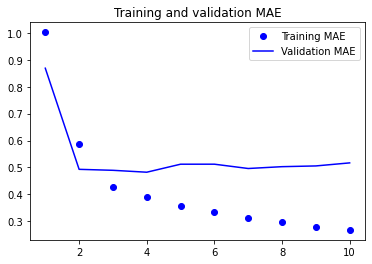

In [110]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [111]:
model = keras.models.load_model('/content/jena_dense.keras')
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

2/2 [==============================] - 0s 5ms/step - loss: 0.3964 - mae: 0.5243
테스트 MAE: 0.52
